<a href="https://colab.research.google.com/github/jalilaf/portfolio/blob/main/jalila_survey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [10]:
df=pd.read_excel("/content/Navigating the Social Impacts of AI Integration_ Misinformation, Isolation, and Social Change Among Young Adults (Yanıtlar).xlsx")

In [11]:
df.head()

,Zaman damgası,"Before proceeding, please confirm the following:",What is your age?,What is your country of residence?,What is your gender?,What is your current occupation?,Are you currently pursuing or have completed higher education?,"How often do you use AI tools (e.g., ChatGPT, Midjourney, AI filters)?",Which AI tools or platforms have you used? (Select all that apply),In which context do you mostly use AI?,...,Do you think people are becoming more emotionally distant because of AI? Why or why not?,Do you use AI to help you with school or work tasks?,"How do you feel about using AI to write essays, generate ideas, or communicate on your behalf?",Has AI changed the way you form opinions or beliefs?,Do you think AI tools encourage or discourage critical thinking? Why?,"Do you think AI-generated personas (avatars, filters, voices) influence your self-image or identity? Yes/No + Explain",What are your biggest concerns about AI in society?,What benefits of AI do you personally value the most? \n,"What should be done (in education, policy, media) to address the social impacts of AI on young people?",Is there anything else you would like to share about your experience or opinion regarding AI?
0,2025-05-16 13:41:06.962,I confirm that I am between the ages of 18 and...,22-23,Germany,Female,Student,Yes,Daily,"ChatGPT, Google Gemini (Bard), Snapchat AI, De...","Academic, Personal/Support",...,Not i guess,5,Good it’s helping,No,Discourage,No,Misleading info can be threatening,It writes long English paragraphs makes my wor...,Regulating it more,NaN
1,2025-05-28 12:29:54.100,I confirm that I am between the ages of 18 and...,24,Canada,Non-Binary,Unemployed,Yes,Daily,"ChatGPT, Google Gemini (Bard), DeepL, AI in ed...","Creative, Social Media, Personal/Support, Ente...",...,"Yes, because many people rely on digital tools...",4,"It’s helpful for brainstorming or saving time,...","Yes, sometimes. It gives quick summaries that ...",They can discourage it if people rely too much...,Yes. They create pressure to look or sound a c...,"I worry about misinformation, job loss, and pe...","I appreciate how AI saves time, helps organize...","There should be more AI literacy in schools, c...","AI is powerful and useful, but we need to stay..."
2,2025-05-28 12:37:36.199,I confirm that I am between the ages of 18 and...,18-19,Canada,Male,Student,Yes,Weekly,"ChatGPT, Google Gemini (Bard), AI in education","Academic, Social Media, Entertainment",...,"Yes, because we rely on quick replies and filt...",5,"It’s cool, but kinda scary. It helps a lot whe...","A bit. It shows me new stuff fast, but I’ve le...","Depends. If I use it just for quick answers, I...",Yes. It’s hard not to compare. Sometimes I fee...,I worry we’re losing what makes us human. It f...,It helps me learn faster and stay organized. W...,"We need honest talks in school , not just tech...","AI is powerful, but it doesn’t always get ho..."
3,2025-05-28 12:46:23.495,I confirm that I am between the ages of 18 and...,20-21,India,Female,Working professional,Yes,Daily,"ChatGPT, Google Gemini (Bard), Snapchat AI, No...","Creative, Social Media, Professional",...,"Yes, I’ve seen it around me and even felt it m...",5,"It helps when I’m stuck, but I still want my v...","Yes, a bit. It shows me new views.\n","Both. If you just copy, it kills thinking. But...",yes. It makes people feel like they need to lo...,That we’ll rely on it too much and forget how ...,It helps me explore ideas faster and keeps me ...,"Make it part of our curriculum, teach both the...","AI is useful, but it can never replace real hu..."
4,2025-05-28 12:53:30.821,I confirm that I am between the ages of 18 and...,24,Turkey,Male,Working professional,Yes,Daily,"ChatGPT, Google Gemini (Bard), Midjourney, Dee...","Professional, Entertainment",...,not really. People choose how they connect. If...,5,It’s efficient. I use it to draft or brainstorm.,Not really. It gives me faster access to infor...,They can encourage it if you use AI as a st

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 31 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype         
---  ------                                                                                                                 --------------  -----         
 0   Zaman damgası                                                                                                          49 non-null     datetime64[ns]
 1   Before proceeding, please confirm the following:                                                                       49 non-null     object        
 2   What is your age?                                                                                                      49 non-null     object        
 3   What is your country of residence?                                                                                   

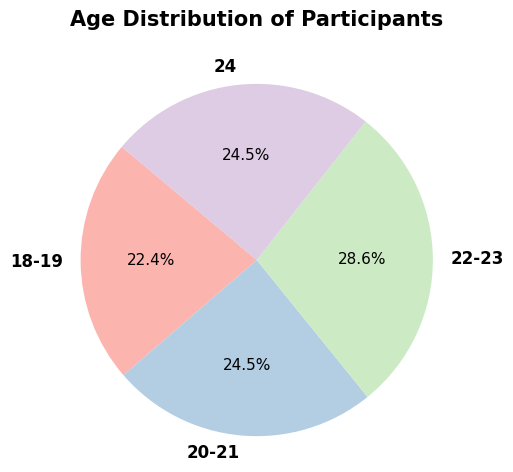

In [13]:
# convert type
df['What is your age?'] = df['What is your age?'].astype(str)
age_counts = df['What is your age?'].value_counts().sort_index()
# start generating pie chart for age column
labels = age_counts.index
sizes = age_counts.values
colors = plt.get_cmap('Pastel1').colors

# Build graph
plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# style
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

#header
plt.title('Age Distribution of Participants', fontsize=15, fontweight='bold', pad=30)
plt.axis('equal')

plt.show()

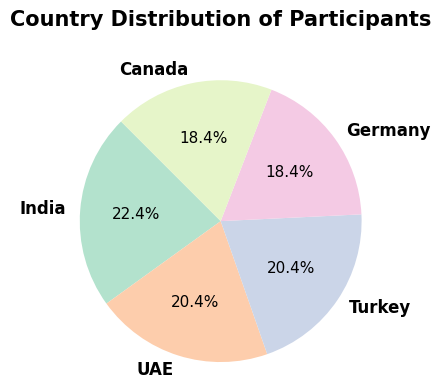

In [14]:

country_col = "What is your country of residence? "
df[country_col] = df[country_col].str.strip()

# Ülke dağılımını al
country_counts = df[country_col].value_counts()

# Pasta grafik oluştur
labels = country_counts.index
sizes = country_counts.values
colors = plt.get_cmap('Pastel2').colors

plt.figure(figsize=(4, 4))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=135,
    colors=colors,
    textprops={'fontsize': 12}
)

for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

plt.title('Country Distribution of Participants', fontsize=15, fontweight='bold', pad=30)
plt.axis('equal')

plt.show()


<Figure size 1200x700 with 0 Axes>

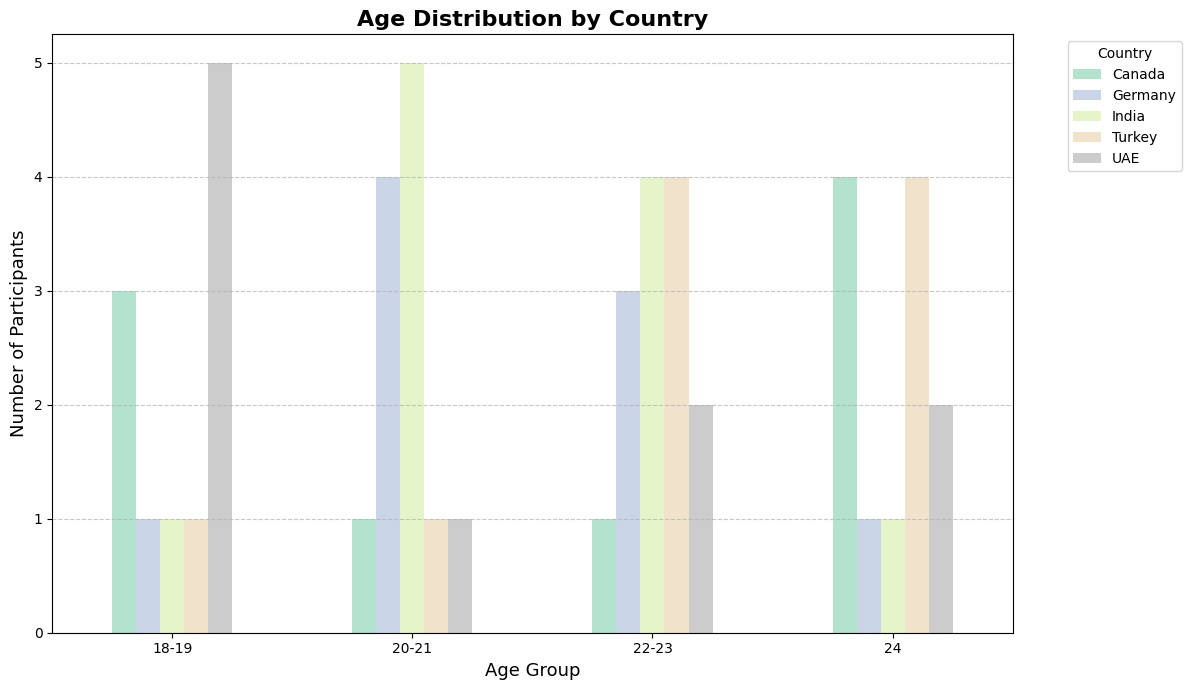

In [15]:

# Yaş ve ülke sütunlarını seç
age_col = 'What is your age?'
country_col = 'What is your country of residence? '

# Veriyi temizle
df[age_col] = df[age_col].astype(str).str.strip()
df[country_col] = df[country_col].str.strip()

# Gruplanmış bar grafik için veri hazırlığı
age_country_counts = df.groupby([country_col, age_col]).size().unstack(fill_value=0)

# Grafik oluştur
plt.figure(figsize=(12, 7))
age_country_counts.T.plot(kind='bar', figsize=(12, 7), colormap='Pastel2')

plt.title('Age Distribution by Country', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Number of Participants', fontsize=13)
plt.xticks(rotation=0)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<Figure size 1200x700 with 0 Axes>

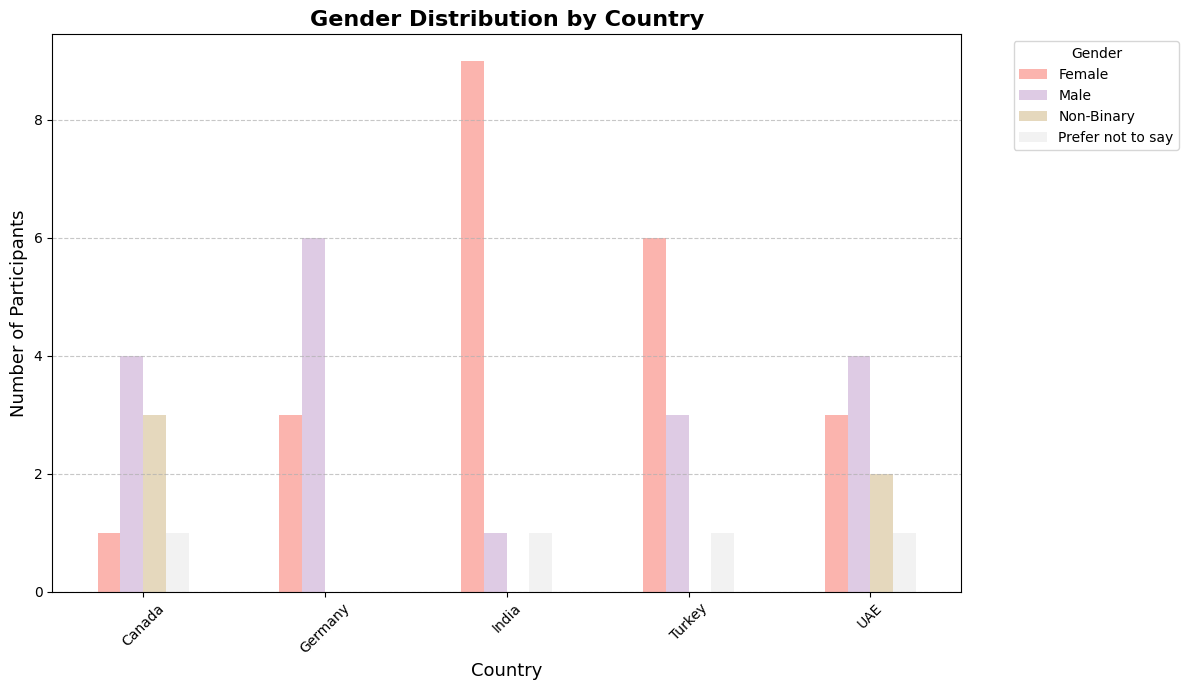

In [16]:
# Gender sütununu hazırlayalım
gender_col = 'What is your gender?'
df[gender_col] = df[gender_col].astype(str).str.strip()

# Country ve Gender'a göre grupla ve say
gender_country_counts = df.groupby([country_col, gender_col]).size().unstack(fill_value=0)

# Bar chart: x-axis = country, grouped bars = gender
plt.figure(figsize=(12, 7))
gender_country_counts.plot(kind='bar', figsize=(12, 7), colormap='Pastel1')

# Title and labels
plt.title('Gender Distribution by Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Participants', fontsize=13)
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


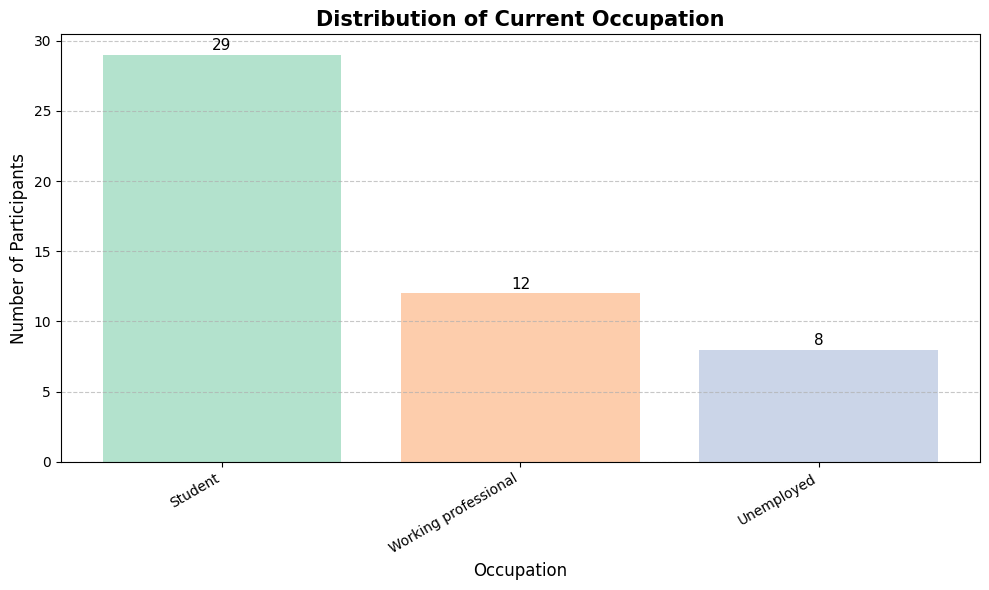

In [17]:
# Occupation column
occupation_col = 'What is your current occupation?'
df[occupation_col] = df[occupation_col].astype(str).str.strip()

# Count each occupation type
occupation_counts = df[occupation_col].value_counts()

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(occupation_counts.index, occupation_counts.values, color=plt.get_cmap('Pastel2').colors)

# Annotate bar values
for i, value in enumerate(occupation_counts.values):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=11)

# Titles and labels
plt.title('Distribution of Current Occupation', fontsize=15, fontweight='bold')
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


<Figure size 1200x700 with 0 Axes>

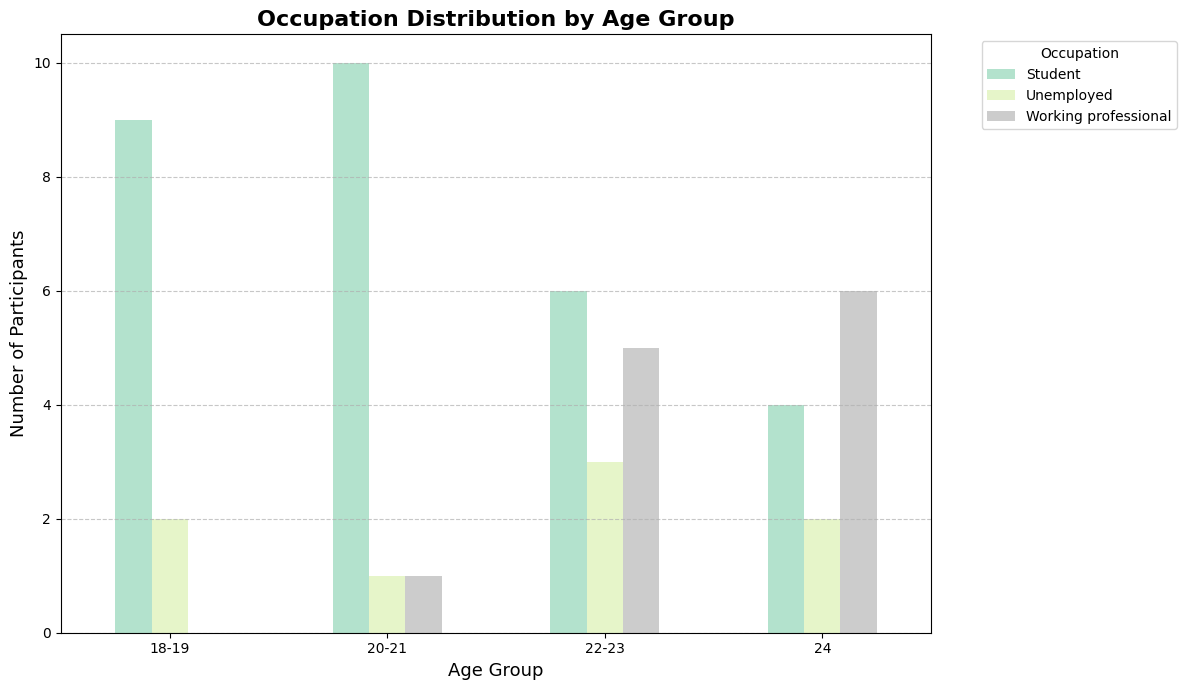

In [18]:
# Group by Age and Occupation
age_occupation_counts = df.groupby([age_col, occupation_col]).size().unstack(fill_value=0)

# Bar chart: x-axis = age group, grouped bars = occupation
plt.figure(figsize=(12, 7))
age_occupation_counts.plot(kind='bar', figsize=(12, 7), colormap='Pastel2')

# Titles and labelsusage score
plt.title('Occupation Distribution by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Number of Participants', fontsize=13)
plt.xticks(rotation=0)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


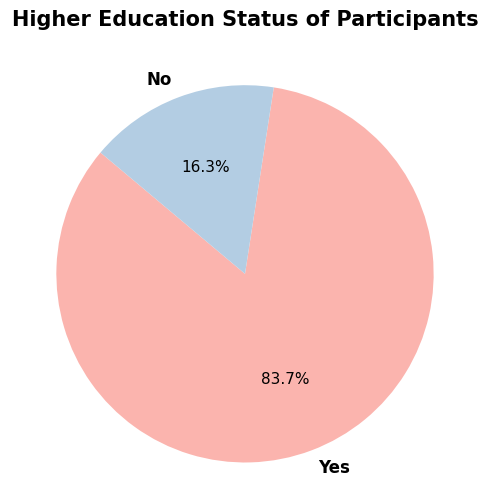

In [19]:
# Education status column
education_col = 'Are you currently pursuing or have completed higher education?'
df[education_col] = df[education_col].astype(str).str.strip()

# Count values
education_counts = df[education_col].value_counts()

# Pie chart
labels = education_counts.index
sizes = education_counts.values
colors = plt.get_cmap('Pastel1').colors

plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Style the text
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

plt.title('Higher Education Status of Participants', fontsize=15, fontweight='bold', pad=30)
plt.axis('equal')
plt.tight_layout()

plt.show()


<Figure size 1200x700 with 0 Axes>

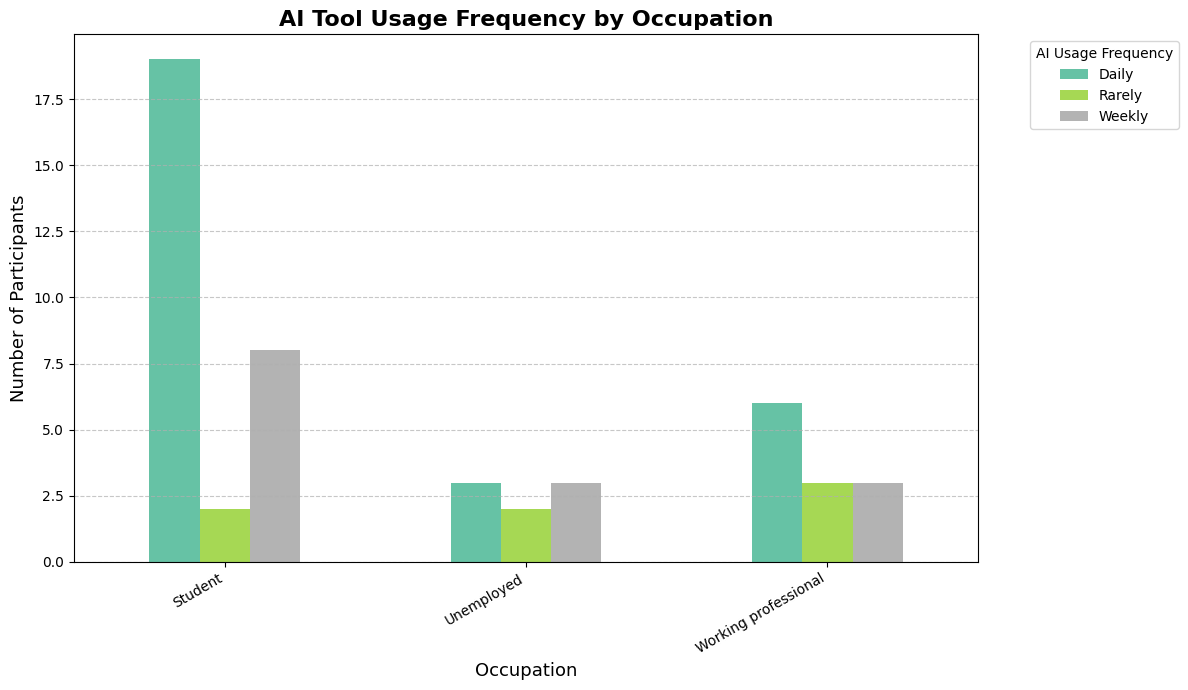

In [20]:
# AI usage frequency column
usage_col = 'How often do you use AI tools (e.g., ChatGPT, Midjourney, AI filters)?'
df[usage_col] = df[usage_col].astype(str).str.strip()

# Group by occupation and AI usage frequency
occupation_ai_usage = df.groupby([occupation_col, usage_col]).size().unstack(fill_value=0)

# Bar chart: x-axis = occupation, grouped bars = usage frequency
plt.figure(figsize=(12, 7))
occupation_ai_usage.plot(kind='bar', figsize=(12, 7), colormap='Set2')

# Title and axis labels
plt.title('AI Tool Usage Frequency by Occupation', fontsize=16, fontweight='bold')
plt.xlabel('Occupation', fontsize=13)
plt.ylabel('Number of Participants', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.legend(title='AI Usage Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [21]:
# Update the score mapping to: Rarely = 1, Weekly = 3, Daily = 5
usage_score_map_updated = {
    'Rarely': 1,
    'Weekly': 3,
    'Daily': 5
}

# Apply the new scoring
df['AI Usage Frequency Score'] = df[usage_col].map(usage_score_map_updated)

# Show updated distribution
df['AI Usage Frequency Score'].value_counts().sort_index()


,count
AI Usage Frequency Score,
1,7
3,14
5,28


In [22]:
df.head()

,Zaman damgası,"Before proceeding, please confirm the following:",What is your age?,What is your country of residence?,What is your gender?,What is your current occupation?,Are you currently pursuing or have completed higher education?,"How often do you use AI tools (e.g., ChatGPT, Midjourney, AI filters)?",Which AI tools or platforms have you used? (Select all that apply),In which context do you mostly use AI?,...,Do you use AI to help you with school or work tasks?,"How do you feel about using AI to write essays, generate ideas, or communicate on your behalf?",Has AI changed the way you form opinions or beliefs?,Do you think AI tools encourage or discourage critical thinking? Why?,"Do you think AI-generated personas (avatars, filters, voices) influence your self-image or identity? Yes/No + Explain",What are your biggest concerns about AI in society?,What benefits of AI do you personally value the most? \n,"What should be done (in education, policy, media) to address the social impacts of AI on young people?",Is there anything else you would like to share about your experience or opinion regarding AI?,AI Usage Frequency Score
0,2025-05-16 13:41:06.962,I confirm that I am between the ages of 18 and...,22-23,Germany,Female,Student,Yes,Daily,"ChatGPT, Google Gemini (Bard), Snapchat AI, De...","Academic, Personal/Support",...,5,Good it’s helping,No,Discourage,No,Misleading info can be threatening,It writes long English paragraphs makes my wor...,Regulating it more,NaN,5
1,2025-05-28 12:29:54.100,I confirm that I am between the ages of 18 and...,24,Canada,Non-Binary,Unemployed,Yes,Daily,"ChatGPT, Google Gemini (Bard), DeepL, AI in ed...","Creative, Social Media, Personal/Support, Ente...",...,4,"It’s helpful for brainstorming or saving time,...","Yes, sometimes. It gives quick summaries that ...",They can discourage it if people rely too much...,Yes. They create pressure to look or sound a c...,"I worry about misinformation, job loss, and pe...","I appreciate how AI saves time, helps organize...","There should be more AI literacy in schools, c...","AI is powerful and useful, but we need to stay...",5
2,2025-05-28 12:37:36.199,I confirm that I am between the ages of 18 and...,18-19,Canada,Male,Student,Yes,Weekly,"ChatGPT, Google Gemini (Bard), AI in education","Academic, Social Media, Entertainment",...,5,"It’s cool, but kinda scary. It helps a lot whe...","A bit. It shows me new stuff fast, but I’ve le...","Depends. If I use it just for quick answers, I...",Yes. It’s hard not to compare. Sometimes I fee...,I worry we’re losing what makes us human. It f...,It helps me learn faster and stay organized. W...,"We need honest talks in school , not just tech...","AI is powerful, but it doesn’t always get ho...",3
3,2025-05-28 12:46:23.495,I confirm that I am between the ages of 18 and...,20-21,India,Female,Working professional,Yes,Daily,"ChatGPT, Google Gemini (Bard), Snapchat AI, No...","Creative, Social Media, Professional",...,5,"It helps when I’m stuck, but I still want my v...","Yes, a bit. It shows me new views.\n","Both. If you just copy, it kills thinking. But...",yes. It makes people feel like they need to lo...,That we’ll rely on it too much and forget how ...,It helps me explore ideas faster and keeps me ...,"Make it part of our curriculum, teach both the...","AI is useful, but it can never replace real hu...",5
4,2025-05-28 12:53:30.821,I confirm that I am between the ages of 18 and...,24,Turkey,Male,Working professional,Yes,Daily,"ChatGPT, Google Gemini (Bard), Midjourney, Dee...","Professional, Entertainment",...,5,It’s efficient. I use it to draft or brainstorm.,Not really. It gives me faster access to infor...,They can encourage it if you use AI as a start...,"I don’t use them, and i believe identity is bu...","My concern isn’t AI itself, but how unprepared...","Time saving. It helps draft documents, summari...",Teach critical thinking and responsible use. D...,Ai is a useful tool not a threat. Like any to...,5


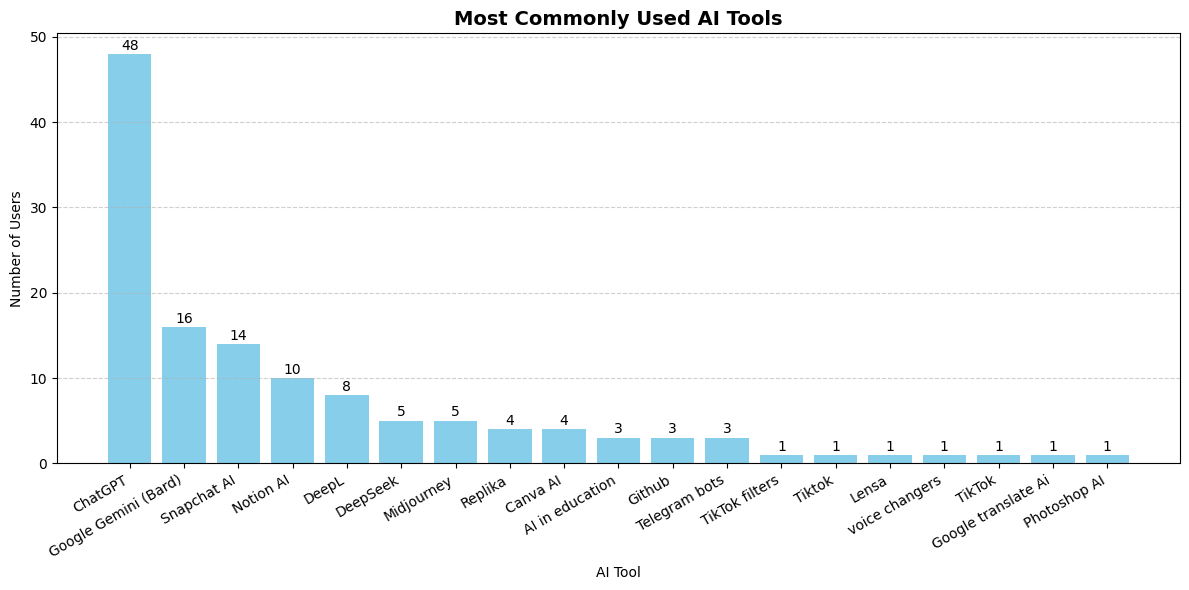

In [23]:
column_name = "Which AI tools or platforms have you used? (Select all that apply)"
ai_tool_data = df[column_name].dropna()

# Step 3: Split and clean the tool names
all_tools = []

for row in ai_tool_data:
    tools = row.split(",")  # Split on comma
    for tool in tools:
        cleaned = tool.strip()  # Remove extra spaces
        all_tools.append(cleaned)

# Step 4: Count tool usage
tool_counts = Counter(all_tools)

# Step 5: Sort the counts from most to least
sorted_tools = tool_counts.most_common()

# Step 6: Plot the bar chart
tools = [tool for tool, count in sorted_tools]
counts = [count for tool, count in sorted_tools]

plt.figure(figsize=(12, 6))
plt.bar(tools, counts, color="skyblue")

# Add count labels on top
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.title("Most Commonly Used AI Tools", fontsize=14, fontweight='bold')
plt.xlabel("AI Tool")
plt.ylabel("Number of Users")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

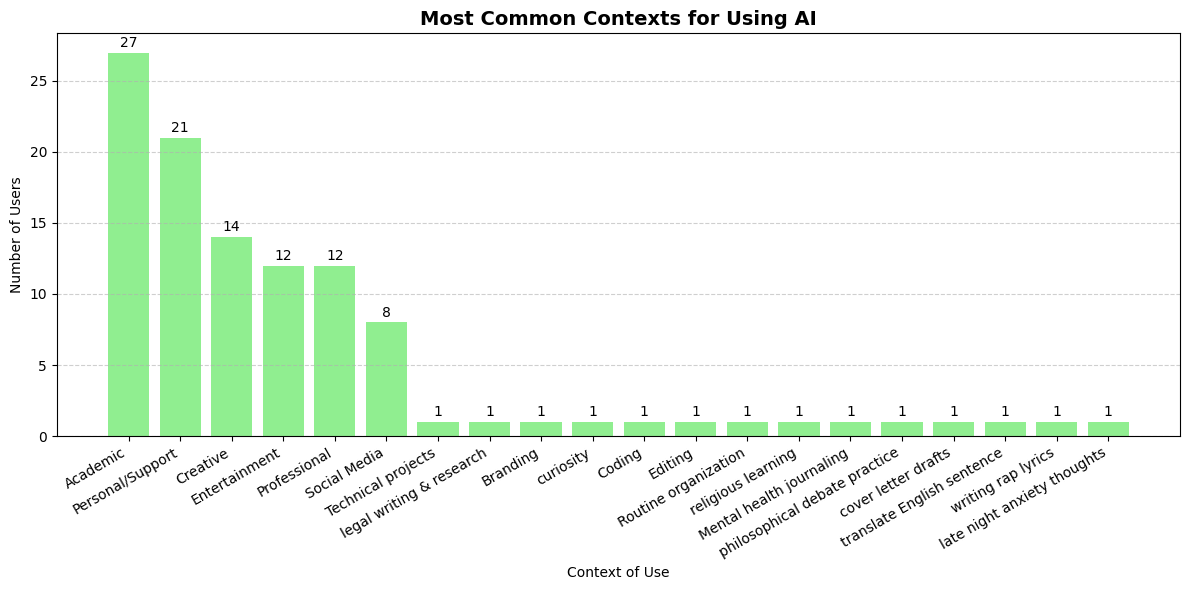

In [24]:
# Next column: "In which context do you mostly use AI?"
context_col = 'In which context do you mostly use AI?'
df[context_col] = df[context_col].astype(str).str.strip()

# Split, clean, and count all responses (multi-select expected)
context_list = df[context_col].dropna().apply(lambda x: [item.strip() for item in x.split(',')])
flat_contexts = [item for sublist in context_list for item in sublist]

# Count frequencies
from collections import Counter
context_counts = Counter(flat_contexts)

# Sort and prepare for plotting
context_sorted = context_counts.most_common()
contexts = [c for c, _ in context_sorted]
counts = [c for _, c in context_sorted]

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(contexts, counts, color='lightgreen')

# Add count labels
for i, count in enumerate(counts):
    plt.text(i, count + 0.4, str(count), ha='center')

plt.title("Most Common Contexts for Using AI", fontsize=14, fontweight='bold')
plt.xlabel("Context of Use")
plt.ylabel("Number of Users")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


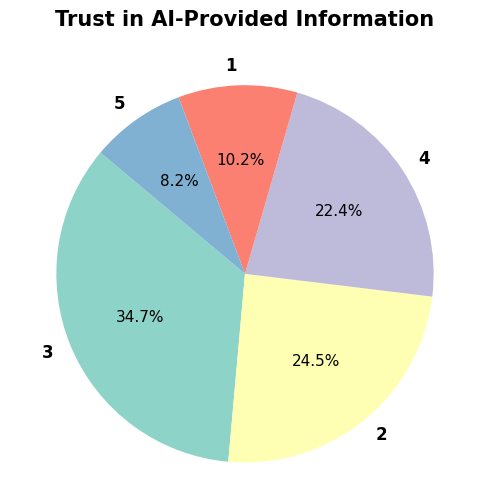

In [25]:
# Column: Do you trust the information provided by AI tools?
trust_col = 'Do you trust the information provided by AI tools?'
df[trust_col] = df[trust_col].astype(str).str.strip()

# Count values
trust_counts = df[trust_col].value_counts()

# Pie chart
labels = trust_counts.index
sizes = trust_counts.values
colors = plt.get_cmap('Set3').colors

plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Style text
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

plt.title('Trust in AI-Provided Information', fontsize=15, fontweight='bold', pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()


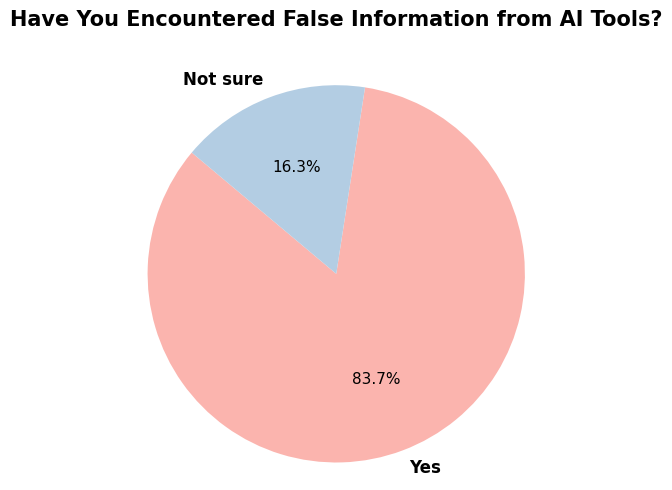

In [26]:
# Column: Have you ever encountered false information from an AI tool?
false_info_col = 'Have you ever encountered information from an AI tool that later turned out to be false?'
df[false_info_col] = df[false_info_col].astype(str).str.strip()

# Count each response
false_info_counts = df[false_info_col].value_counts()

# Pie chart
labels = false_info_counts.index
sizes = false_info_counts.values
colors = plt.get_cmap('Pastel1').colors

plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Style text
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

plt.title('Have You Encountered False Information from AI Tools?', fontsize=15, fontweight='bold', pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()


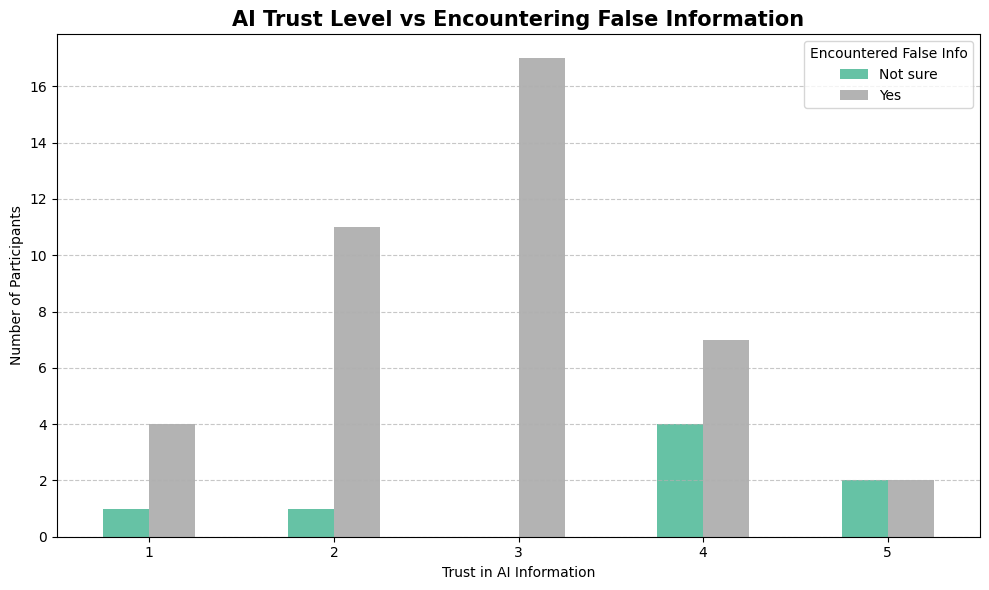

In [27]:
# Recreate crosstab to ensure correct labels
trust_vs_false = pd.crosstab(df[trust_col], df[false_info_col])

# Sort trust levels for consistent x-axis order
trust_vs_false = trust_vs_false.reindex(sorted(trust_vs_false.index), axis=0)

# Plot the grouped bar chart
trust_vs_false.plot(kind='bar', figsize=(10, 6), colormap='Set2')

plt.title('AI Trust Level vs Encountering False Information', fontsize=15, fontweight='bold')
plt.xlabel('Trust in AI Information')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.legend(title='Encountered False Info')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


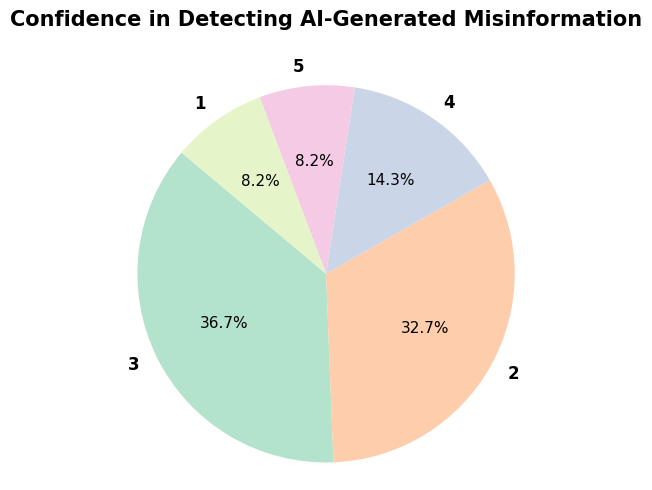

In [28]:
# Column: How confident are you in detecting AI-generated misinformation online?
confidence_col = 'How confident are you in detecting AI-generated misinformation online?'
df[confidence_col] = df[confidence_col].astype(str).str.strip()

# Count responses
confidence_counts = df[confidence_col].value_counts()

# Pie chart
labels = confidence_counts.index
sizes = confidence_counts.values
colors = plt.get_cmap('Pastel2').colors

plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Text styling
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

plt.title('Confidence in Detecting AI-Generated Misinformation', fontsize=15, fontweight='bold', pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()


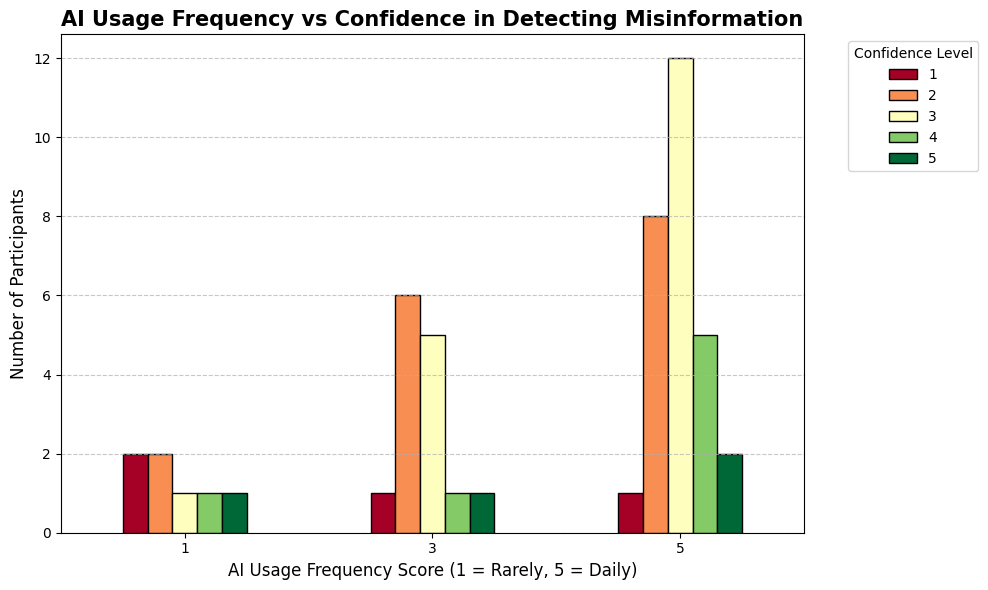

In [29]:
usage_col = "How often do you use AI tools (e.g., ChatGPT, Midjourney, AI filters)?"
confidence_col = "How confident are you in detecting AI-generated misinformation online?"

df[usage_col] = df[usage_col].astype(str).str.strip()
df[confidence_col] = df[confidence_col].astype(str).str.strip()

# Step 3: Convert usage to numeric scores
# Rarely = 1, Weekly = 3, Daily = 5 (adjust if you have other categories)
usage_score_map = {
    "Rarely": 1,
    "Weekly": 3,
    "Daily": 5
}
df["Usage Score"] = df[usage_col].map(usage_score_map)

# Step 4: Create a crosstab of Usage Score vs Confidence
crosstab = pd.crosstab(df["Usage Score"], df[confidence_col])

# Optional: Sort usage scores for nice x-axis order
crosstab = crosstab.reindex([1, 3, 5])

# Step 5: Generate a color map for confidence levels (Red → Yellow → Green)
confidence_levels = crosstab.columns.tolist()
colors = plt.get_cmap("RdYlGn")(np.linspace(0, 1, len(confidence_levels)))
confidence_colors = dict(zip(confidence_levels, colors))

# Step 6: Plot the grouped bar chart
ax = crosstab.plot(
    kind="bar",
    figsize=(10, 6),
    color=[confidence_colors[level] for level in confidence_levels],
    edgecolor="black"
)

# Step 7: Formatting and labels
plt.title("AI Usage Frequency vs Confidence in Detecting Misinformation", fontsize=15, fontweight="bold")
plt.xlabel("AI Usage Frequency Score (1 = Rarely, 5 = Daily)", fontsize=12)
plt.ylabel("Number of Participants", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Confidence Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

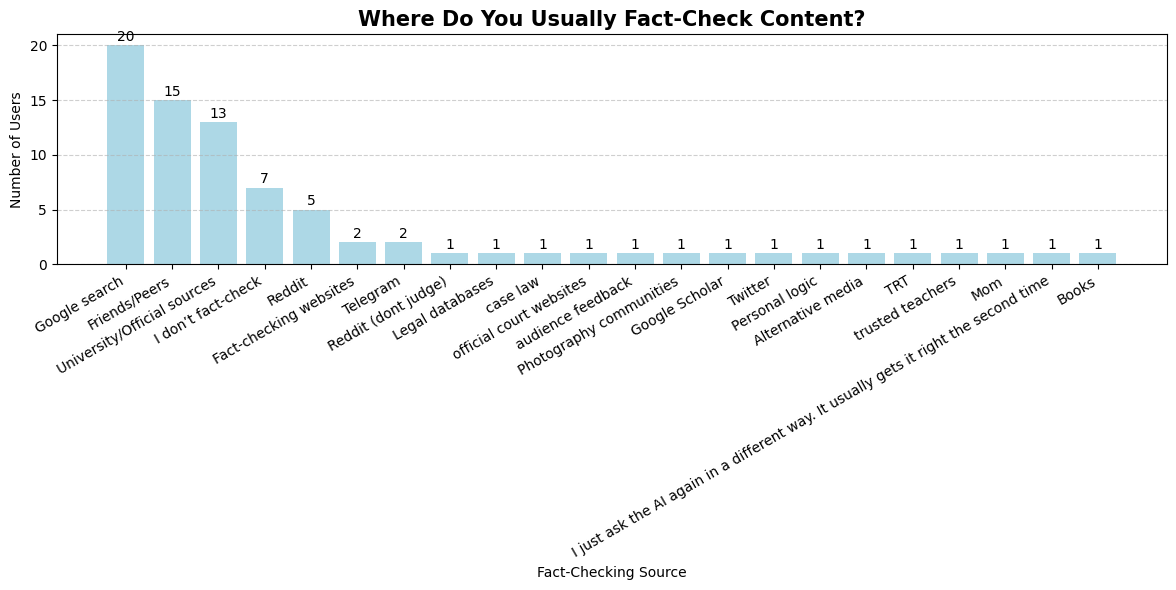

In [30]:
# Column: Where do you usually fact-check content?
factcheck_col = 'Where do you usually fact-check content?'
df[factcheck_col] = df[factcheck_col].astype(str).str.strip()

# Split comma-separated values, clean them, and count occurrences
factcheck_list = df[factcheck_col].dropna().apply(lambda x: [item.strip() for item in x.split(',')])
flat_factcheck = [item for sublist in factcheck_list for item in sublist]

# Count with Counter
from collections import Counter
factcheck_counts = Counter(flat_factcheck)

# Sort and prepare for bar chart
sorted_factchecks = factcheck_counts.most_common()
sources = [src for src, _ in sorted_factchecks]
counts = [cnt for _, cnt in sorted_factchecks]

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(sources, counts, color='lightblue')

# Add count labels
for i, count in enumerate(counts):
    plt.text(i, count + 0.4, str(count), ha='center')

plt.title('Where Do You Usually Fact-Check Content?', fontsize=15, fontweight='bold')
plt.xlabel('Fact-Checking Source')
plt.ylabel('Number of Users')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


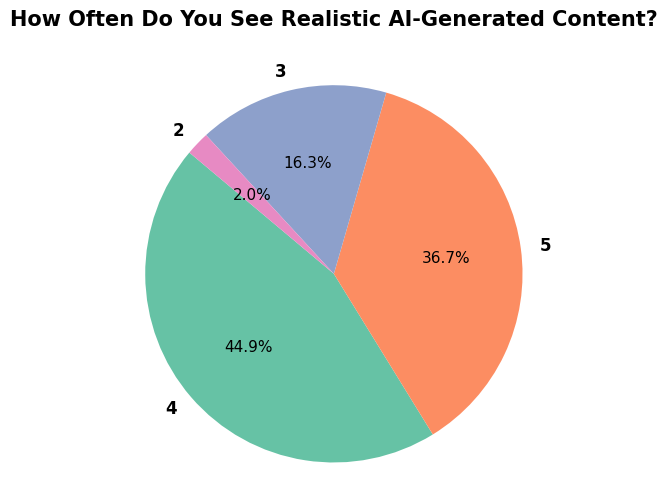

In [31]:
# Column: Frequency of seeing indistinguishable AI-generated content
realism_freq_col = 'How often do you see AI-generated content (text/images/videos) that feels indistinguishable from reality? '
df[realism_freq_col] = df[realism_freq_col].astype(str).str.strip()

# Count responses
realism_freq_counts = df[realism_freq_col].value_counts()

# Pie chart
labels = realism_freq_counts.index
sizes = realism_freq_counts.values
colors = plt.get_cmap('Set2').colors

plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Styling
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

plt.title('How Often Do You See Realistic AI-Generated Content?', fontsize=15, fontweight='bold', pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [53]:
# Define a color gradient for realism perception categories (green = often, red = rarely)
realism_levels = usage_vs_realism_obj.columns.tolist()
realism_colors = plt.get_cmap('RdYlGn')(np.linspace(0, 1, len(realism_levels)))
realism_color_map = dict(zip(realism_levels, realism_colors))

# Plot using manually assigned colors based on realism perception
ax = usage_vs_realism_obj.plot(
    kind='bar',
    figsize=(10, 6),
    color=[realism_color_map[col] for col in realism_levels],
    edgecolor='black'
)

# Formatting
plt.title('Perception of Realistic AI Content by Usage Frequency\n(Color Gradient by Realism Perception)', fontsize=15, fontweight='bold')
plt.xlabel('How Often Do You Use AI Tools?', fontsize=12)
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.legend(title='Frequency of Realistic AI Content', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


NameError: name 'usage_vs_realism_obj' is not defined

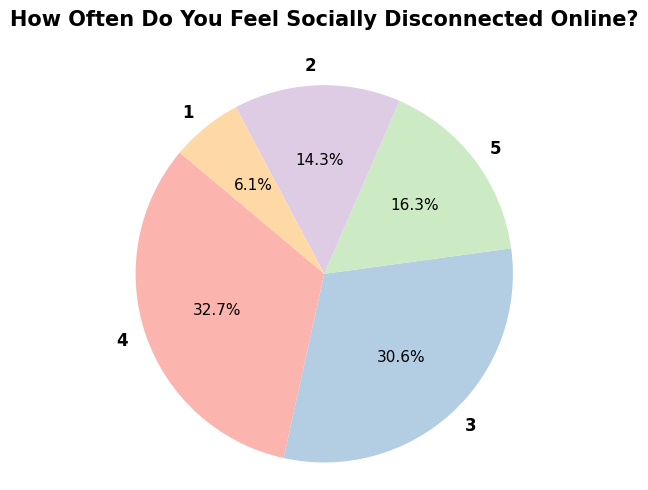

In [38]:
# Column: How often do you feel socially disconnected or isolated when spending time online?
isolation_col = 'How often do you feel socially disconnected or isolated when spending time online? '
df[isolation_col] = df[isolation_col].astype(str).str.strip()

# Count responses
isolation_counts = df[isolation_col].value_counts()

# Pie chart
labels = isolation_counts.index
sizes = isolation_counts.values
colors = plt.get_cmap('Pastel1').colors

plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Styling
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

plt.title('How Often Do You Feel Socially Disconnected Online?', fontsize=15, fontweight='bold', pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()


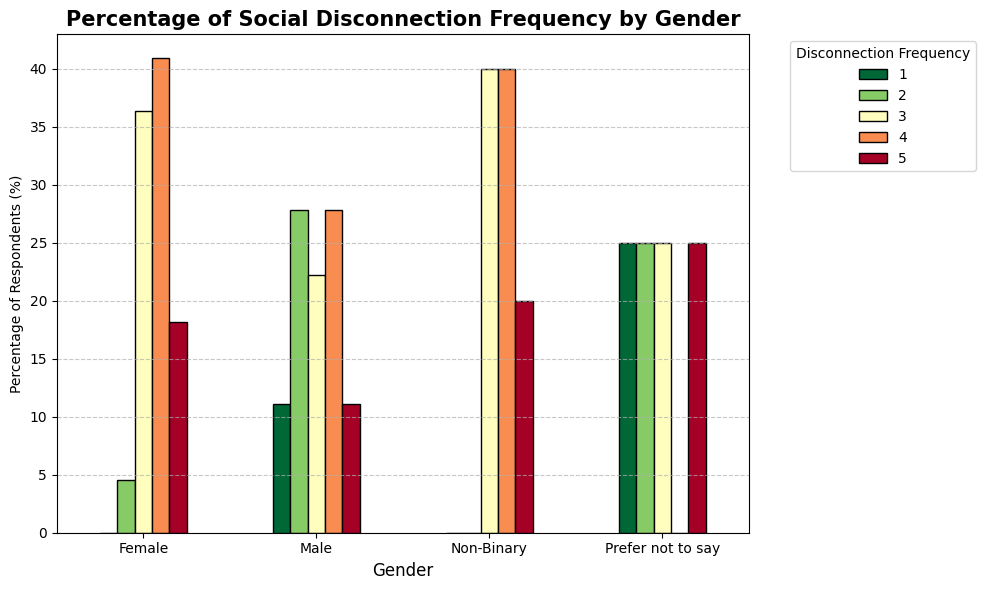

In [39]:
gender_col = "What is your gender?"
isolation_col = "How often do you feel socially disconnected or isolated when spending time online? "

df[gender_col] = df[gender_col].astype(str).str.strip()
df[isolation_col] = df[isolation_col].astype(str).str.strip()

# Step 3: Create percentage crosstab (normalized per gender)
gender_vs_isolation_pct = pd.crosstab(df[gender_col], df[isolation_col], normalize='index') * 100

# Step 4: Define a red-to-green color map (5 = red, 1 = green)
isolation_levels = gender_vs_isolation_pct.columns.tolist()
color_gradient = plt.get_cmap('RdYlGn_r')(np.linspace(0, 1, len(isolation_levels)))  # red = high isolation
disconnect_color_map = dict(zip(isolation_levels, color_gradient))

# Step 5: Plot as % chart with color-coded bars
colors = [disconnect_color_map[level] for level in isolation_levels]

ax = gender_vs_isolation_pct.plot(
    kind='bar',
    figsize=(10, 6),
    color=colors,
    edgecolor='black'
)

# Step 6: Format chart
plt.title('Percentage of Social Disconnection Frequency by Gender', fontsize=15, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage of Respondents (%)')
plt.xticks(rotation=0)
plt.legend(title='Disconnection Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

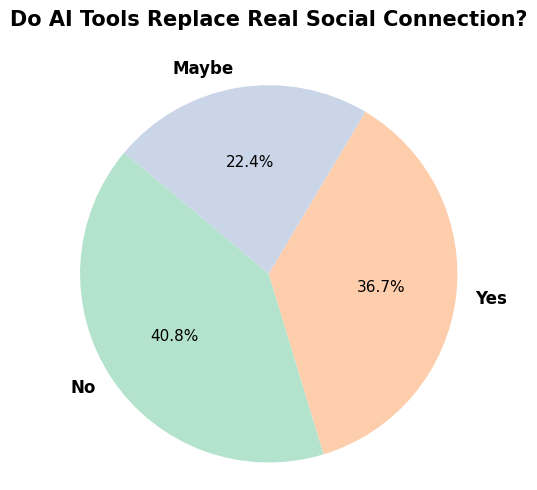

In [40]:
# Column: Do you feel AI tools replace real social connection?
replace_connection_col = 'Do you feel AI tools (e.g., AI friends, chatbots, filters etc.) replace real social connection? '
df[replace_connection_col] = df[replace_connection_col].astype(str).str.strip()

# Count responses
replace_connection_counts = df[replace_connection_col].value_counts()

# Pie chart
labels = replace_connection_counts.index
sizes = replace_connection_counts.values
colors = plt.get_cmap('Pastel2').colors

plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Styling
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

plt.title('Do AI Tools Replace Real Social Connection?', fontsize=15, fontweight='bold', pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [41]:
# Map responses to numerical scores: No = 1, Maybe = 3, Yes = 5
replace_connection_score_map = {
    'No': 1,
    'no': 1,
    'NO': 1,
    'Maybe': 3,
    'maybe': 3,
    'MAYBE': 3,
    'Yes': 5,
    'yes': 5,
    'YES': 5
}

# Apply mapping and create new column
df['AI Replaces Social Connection Score'] = df[replace_connection_col].map(replace_connection_score_map)

# Show value counts for verification
df['AI Replaces Social Connection Score'].value_counts().sort_index()


,count
AI Replaces Social Connection Score,
1,20
3,11
5,18


In [35]:
df.head()

,Zaman damgası,"Before proceeding, please confirm the following:",What is your age?,What is your country of residence?,What is your gender?,What is your current occupation?,Are you currently pursuing or have completed higher education?,"How often do you use AI tools (e.g., ChatGPT, Midjourney, AI filters)?",Which AI tools or platforms have you used? (Select all that apply),In which context do you mostly use AI?,...,"How do you feel about using AI to write essays, generate ideas, or communicate on your behalf?",Has AI changed the way you form opinions or beliefs?,Do you think AI tools encourage or discourage critical thinking? Why?,"Do you think AI-generated personas (avatars, filters, voices) influence your self-image or identity? Yes/No + Explain",What are your biggest concerns about AI in society?,What benefits of AI do you personally value the most? \n,"What should be done (in education, policy, media) to address the social impacts of AI on young people?",Is there anything else you would like to share about your experience or opinion regarding AI?,AI Usage Frequency Score,Usage Score
0,2025-05-16 13:41:06.962,I confirm that I am between the ages of 18 and...,22-23,Germany,Female,Student,Yes,Daily,"ChatGPT, Google Gemini (Bard), Snapchat AI, De...","Academic, Personal/Support",...,Good it’s helping,No,Discourage,No,Misleading info can be threatening,It writes long English paragraphs makes my wor...,Regulating it more,NaN,5,5
1,2025-05-28 12:29:54.100,I confirm that I am between the ages of 18 and...,24,Canada,Non-Binary,Unemployed,Yes,Daily,"ChatGPT, Google Gemini (Bard), DeepL, AI in ed...","Creative, Social Media, Personal/Support, Ente...",...,"It’s helpful for brainstorming or saving time,...","Yes, sometimes. It gives quick summaries that ...",They can discourage it if people rely too much...,Yes. They create pressure to look or sound a c...,"I worry about misinformation, job loss, and pe...","I appreciate how AI saves time, helps organize...","There should be more AI literacy in schools, c...","AI is powerful and useful, but we need to stay...",5,5
2,2025-05-28 12:37:36.199,I confirm that I am between the ages of 18 and...,18-19,Canada,Male,Student,Yes,Weekly,"ChatGPT, Google Gemini (Bard), AI in education","Academic, Social Media, Entertainment",...,"It’s cool, but kinda scary. It helps a lot whe...","A bit. It shows me new stuff fast, but I’ve le...","Depends. If I use it just for quick answers, I...",Yes. It’s hard not to compare. Sometimes I fee...,I worry we’re losing what makes us human. It f...,It helps me learn faster and stay organized. W...,"We need honest talks in school , not just tech...","AI is powerful, but it doesn’t always get ho...",3,3
3,2025-05-28 12:46:23.495,I confirm that I am between the ages of 18 and...,20-21,India,Female,Working professional,Yes,Daily,"ChatGPT, Google Gemini (Bard), Snapchat AI, No...","Creative, Social Media, Professional",...,"It helps when I’m stuck, but I still want my v...","Yes, a bit. It shows me new views.\n","Both. If you just copy, it kills thinking. But...",yes. It makes people feel like they need to lo...,That we’ll rely on it too much and forget how ...,It helps me explore ideas faster and keeps me ...,"Make it part of our curriculum, teach both the...","AI is useful, but it can never replace real hu...",5,5
4,2025-05-28 12:53:30.821,I confirm that I am between the ages of 18 and...,24,Turkey,Male,Working professional,Yes,Daily,"ChatGPT, Google Gemini (Bard), Midjourney, Dee...","Professional, Entertainment",...,It’s efficient. I use it to draft or brainstorm.,Not really. It gives me faster access to infor...,They can encourage it if you use AI as a start...,"I don’t use them, and i believe identity is bu...","My concern isn’t AI itself, but how unprepared...","Time saving. It helps draft documents, summari...",Teach critical thinking and responsible use. D...,Ai is a useful tool not a threat. Like any to...,5,5


In [42]:
df.drop("Usage Score",axis=1,inplace=True)
df.head()

,Zaman damgası,"Before proceeding, please confirm the following:",What is your age?,What is your country of residence?,What is your gender?,What is your current occupation?,Are you currently pursuing or have completed higher education?,"How often do you use AI tools (e.g., ChatGPT, Midjourney, AI filters)?",Which AI tools or platforms have you used? (Select all that apply),In which context do you mostly use AI?,...,"How do you feel about using AI to write essays, generate ideas, or communicate on your behalf?",Has AI changed the way you form opinions or beliefs?,Do you think AI tools encourage or discourage critical thinking? Why?,"Do you think AI-generated personas (avatars, filters, voices) influence your self-image or identity? Yes/No + Explain",What are your biggest concerns about AI in society?,What benefits of AI do you personally value the most? \n,"What should be done (in education, policy, media) to address the social impacts of AI on young people?",Is there anything else you would like to share about your experience or opinion regarding AI?,AI Usage Frequency Score,AI Replaces Social Connection Score
0,2025-05-16 13:41:06.962,I confirm that I am between the ages of 18 and...,22-23,Germany,Female,Student,Yes,Daily,"ChatGPT, Google Gemini (Bard), Snapchat AI, De...","Academic, Personal/Support",...,Good it’s helping,No,Discourage,No,Misleading info can be threatening,It writes long English paragraphs makes my wor...,Regulating it more,NaN,5,1
1,2025-05-28 12:29:54.100,I confirm that I am between the ages of 18 and...,24,Canada,Non-Binary,Unemployed,Yes,Daily,"ChatGPT, Google Gemini (Bard), DeepL, AI in ed...","Creative, Social Media, Personal/Support, Ente...",...,"It’s helpful for brainstorming or saving time,...","Yes, sometimes. It gives quick summaries that ...",They can discourage it if people rely too much...,Yes. They create pressure to look or sound a c...,"I worry about misinformation, job loss, and pe...","I appreciate how AI saves time, helps organize...","There should be more AI literacy in schools, c...","AI is powerful and useful, but we need to stay...",5,5
2,2025-05-28 12:37:36.199,I confirm that I am between the ages of 18 and...,18-19,Canada,Male,Student,Yes,Weekly,"ChatGPT, Google Gemini (Bard), AI in education","Academic, Social Media, Entertainment",...,"It’s cool, but kinda scary. It helps a lot whe...","A bit. It shows me new stuff fast, but I’ve le...","Depends. If I use it just for quick answers, I...",Yes. It’s hard not to compare. Sometimes I fee...,I worry we’re losing what makes us human. It f...,It helps me learn faster and stay organized. W...,"We need honest talks in school , not just tech...","AI is powerful, but it doesn’t always get ho...",3,3
3,2025-05-28 12:46:23.495,I confirm that I am between the ages of 18 and...,20-21,India,Female,Working professional,Yes,Daily,"ChatGPT, Google Gemini (Bard), Snapchat AI, No...","Creative, Social Media, Professional",...,"It helps when I’m stuck, but I still want my v...","Yes, a bit. It shows me new views.\n","Both. If you just copy, it kills thinking. But...",yes. It makes people feel like they need to lo...,That we’ll rely on it too much and forget how ...,It helps me explore ideas faster and keeps me ...,"Make it part of our curriculum, teach both the...","AI is useful, but it can never replace real hu...",5,5
4,2025-05-28 12:53:30.821,I confirm that I am between the ages of 18 and...,24,Turkey,Male,Working professional,Yes,Daily,"ChatGPT, Google Gemini (Bard), Midjourney, Dee...","Professional, Entertainment",...,It’s efficient. I use it to draft or brainstorm.,Not really. It gives me faster access to infor...,They can encourage it if you use AI as a start...,"I don’t use them, and i believe identity is bu...","My concern isn’t AI itself, but how unprepared...","Time saving. It helps draft documents, summari...",Teach critical thinking and responsible use. D...,Ai is a useful tool not a threat. Like any to...,5,3


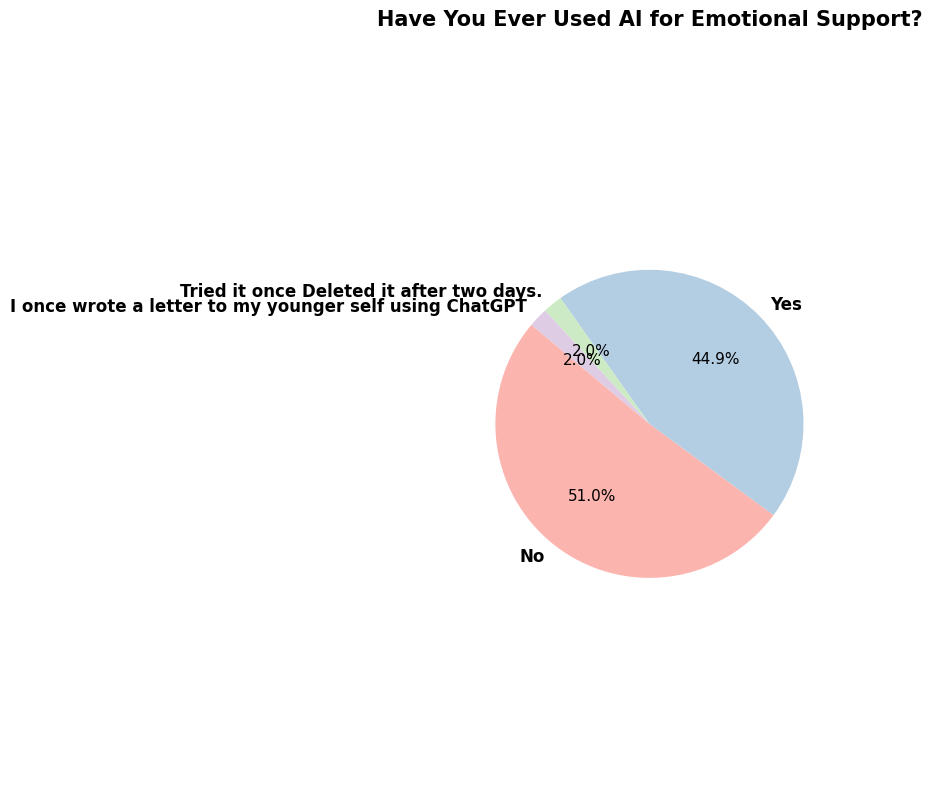

In [43]:
# Column: Have you ever used AI for emotional support?
emotional_support_col = 'Have you ever used AI for emotional support (e.g., talking to chatbots like Replika)? '
df[emotional_support_col] = df[emotional_support_col].astype(str).str.strip()

# Count responses
emotional_support_counts = df[emotional_support_col].value_counts()

# Pie chart
labels = emotional_support_counts.index
sizes = emotional_support_counts.values
colors = plt.get_cmap('Pastel1').colors

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Styling
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

plt.title('Have You Ever Used AI for Emotional Support?', fontsize=15, fontweight='bold', pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()


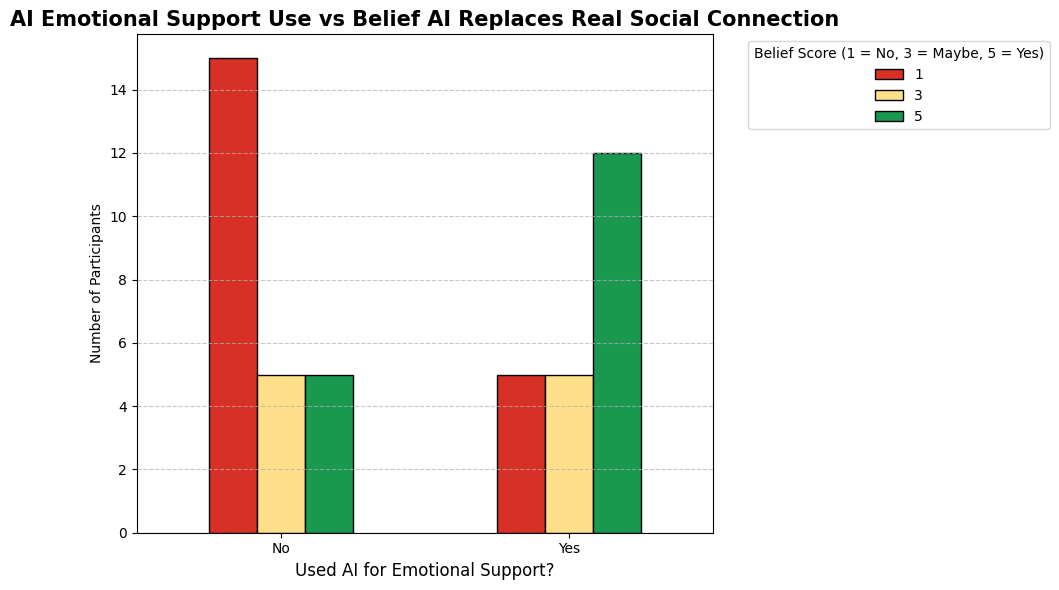

In [44]:

emotional_support_col = 'Have you ever used AI for emotional support (e.g., talking to chatbots like Replika)? '
replace_connection_col = 'Do you feel AI tools (e.g., AI friends, chatbots, filters etc.) replace real social connection? '

# Step 1: Clean data
df[emotional_support_col] = df[emotional_support_col].astype(str).str.strip().str.capitalize()
df[replace_connection_col] = df[replace_connection_col].astype(str).str.strip().str.capitalize()

# Step 2: Keep only 'Yes' and 'No' rows for emotional support
valid_responses = ['Yes', 'No']
df_filtered = df[df[emotional_support_col].isin(valid_responses)].copy()

# Step 3: Map belief scores to 1/3/5
belief_map = {'No': 1, 'Maybe': 3, 'Yes': 5}
df_filtered['AI Replaces Social Connection Score'] = df_filtered[replace_connection_col].map(belief_map)

# Step 4: Create crosstab
support_vs_replace_label = pd.crosstab(
    df_filtered[emotional_support_col],  # keep Yes/No
    df_filtered['AI Replaces Social Connection Score']
)

# Step 5: Sort rows and columns
support_vs_replace_label = support_vs_replace_label.reindex(['No', 'Yes']).reindex([1, 3, 5], axis=1)

# Step 6: Color mapping
replace_connection_color_map = {
    1: '#d73027',  # red
    3: '#fee08b',  # yellow
    5: '#1a9850'   # green
}
belief_colors = [replace_connection_color_map.get(col, '#cccccc') for col in support_vs_replace_label.columns]

# Step 7: Plot
ax = support_vs_replace_label.plot(
    kind='bar',
    figsize=(10, 6),
    color=belief_colors,
    edgecolor='black'
)

plt.title('AI Emotional Support Use vs Belief AI Replaces Real Social Connection', fontsize=15, fontweight='bold')
plt.xlabel('Used AI for Emotional Support?', fontsize=12)
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.legend(title='Belief Score (1 = No, 3 = Maybe, 5 = Yes)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


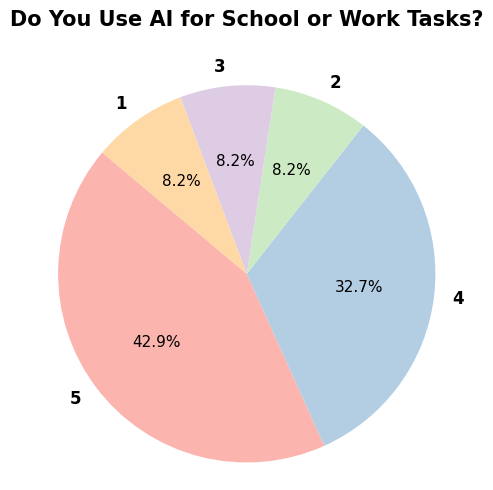

In [45]:
# Column: Do you use AI to help you with school or work tasks?
school_work_col = 'Do you use AI to help you with school or work tasks?'
df[school_work_col] = df[school_work_col].astype(str).str.strip().str.capitalize()

# Count responses
school_work_counts = df[school_work_col].value_counts()

# Plot pie chart
labels = school_work_counts.index
sizes = school_work_counts.values
colors = plt.get_cmap('Pastel1').colors

plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Styling
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

plt.title('Do You Use AI for School or Work Tasks?', fontsize=15, fontweight='bold', pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [55]:
# Recalculate the correct order of occupations based on frequency
occupation_order = df[occupation_col].value_counts().index

# Re-plot with occupation_order now defined
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_filtered,
    y=occupation_col,
    hue='SchoolWork_AIScore',
    palette=school_work_palette,
    order=occupation_order,
    edgecolor='black'
)

plt.title('AI Use for School/Work Tasks by Occupation', fontsize=15, fontweight='bold')
plt.xlabel('Number of Participants')
plt.ylabel('Occupation')
plt.legend(title='AI Use Score (1 = Not at all, 5 = Very frequent)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


NameError: name 'school_work_palette' is not defined

<Figure size 1000x600 with 0 Axes>

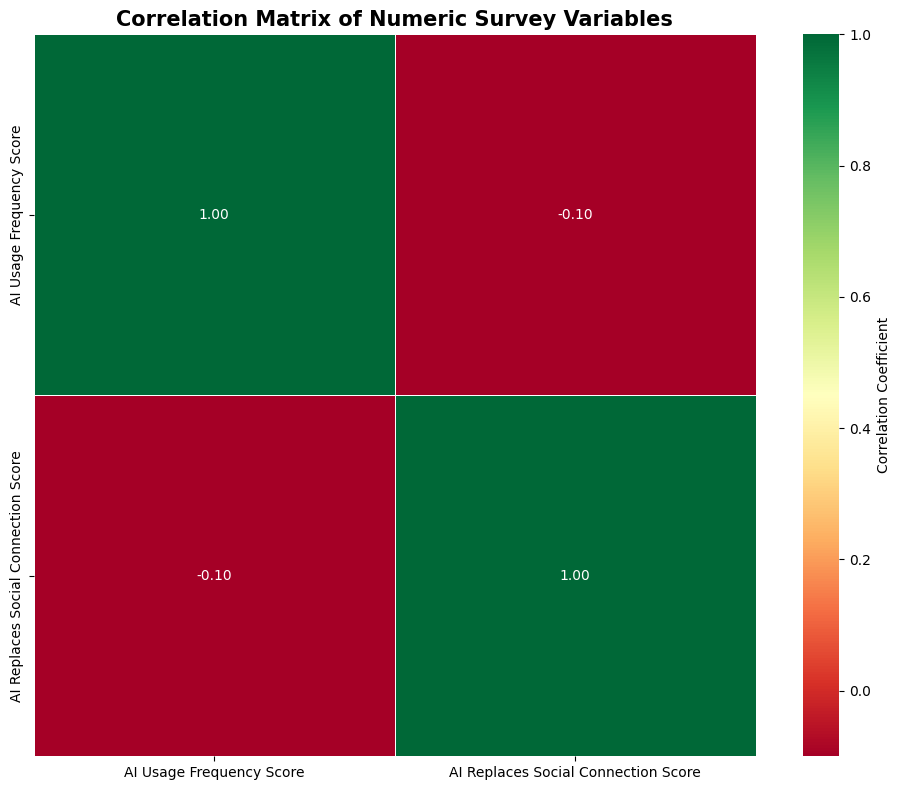

In [47]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='RdYlGn',
    fmt='.2f',
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation Matrix of Numeric Survey Variables', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


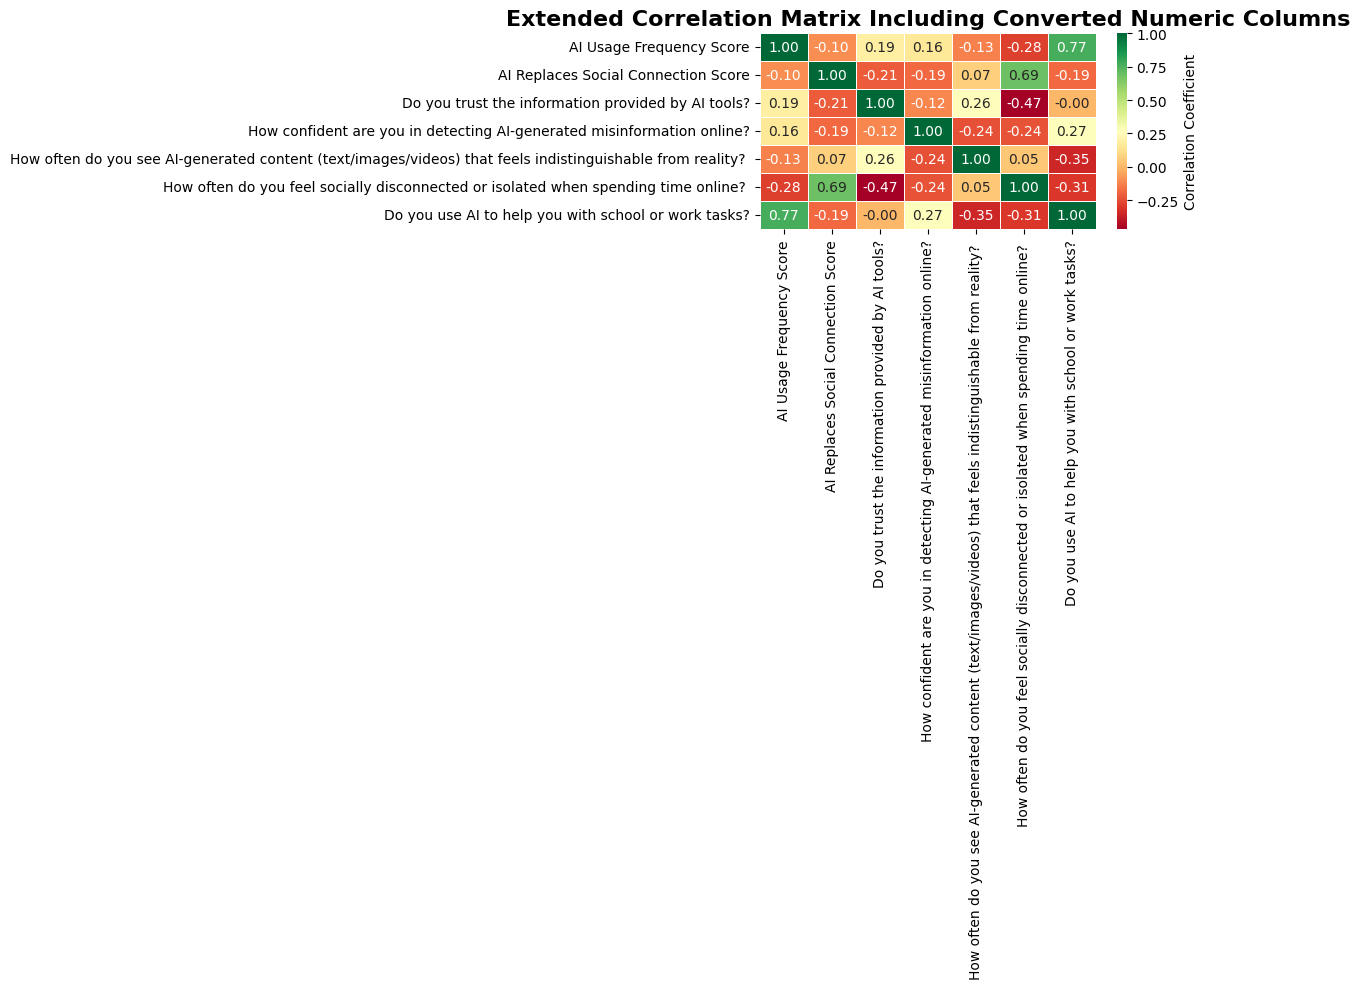

In [48]:
# Detect object columns with numeric-looking values
potential_numeric_objects = df.select_dtypes(include='object').copy()

# Try converting each column to numeric and retain those that work
numeric_converted_cols = {}
for col in potential_numeric_objects.columns:
    try:
        converted = pd.to_numeric(potential_numeric_objects[col], errors='raise')
        numeric_converted_cols[col] = converted
    except:
        continue

# Create a new DataFrame with these newly converted numeric columns
converted_numeric_df = pd.DataFrame(numeric_converted_cols)

# Combine with already numeric columns
complete_numeric_df = pd.concat([df.select_dtypes(include='number'), converted_numeric_df], axis=1)

# Drop duplicate columns (if any)
complete_numeric_df = complete_numeric_df.loc[:, ~complete_numeric_df.columns.duplicated()]

# Compute and plot correlation matrix
correlation_matrix_all = complete_numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix_all,
    annot=True,
    cmap='RdYlGn',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Extended Correlation Matrix Including Converted Numeric Columns', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
